In [2]:
# pandas/numpy for handling data
import pandas as pd
import numpy as np

# seaborn/matplotlib for graphing
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mc

# statistics
from statistics import mean 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scikit_posthocs as sp
from statsmodels.stats.anova import AnovaRM

# helper fxns for analyzing chr aberr data
import chr_aberr_helper_fxns as cah

# setting a global darkgrid style w/ dark edge plot elements for plotting
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
&nbsp; 

...

&nbsp; 

---

# Analyzing telomeric aberrations
---

## Reading in telomeric aberration data (inflight astros)

In [11]:
melt_all_astro_telo_aberr = pd.read_csv('../data/compiled and processed data/melt_all_astro_telo_aberr.csv')
melt_all_astro_telo_aberr['astro id'] = melt_all_astro_telo_aberr['astro id'].astype('str')
melt_all_astro_telo_aberr = melt_all_astro_telo_aberr[melt_all_astro_telo_aberr['aberration type'] != '# of STL-complete']

In [12]:
melt_all_astro_telo_aberr.head(4)

,astro id,flight status,aberration type,count per cell
0,2171.0,pre-flight,# of Fragile Telos,1.0
1,2171.0,pre-flight,# of Fragile Telos,1.0
2,2171.0,pre-flight,# of Fragile Telos,0.0
3,2171.0,pre-flight,# of Fragile Telos,2.0


## Graphing telomeric aberrations (inflight astros)

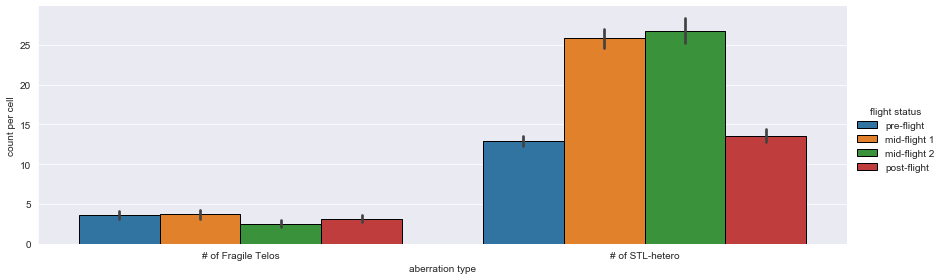

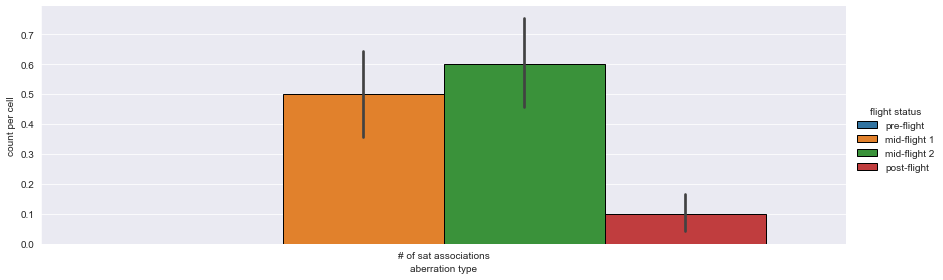

In [13]:
# let's make two graphs, one w/o and one w/ satellite associations

data=melt_all_astro_telo_aberr[melt_all_astro_telo_aberr['aberration type'] != '# of sat associations']
data2=melt_all_astro_telo_aberr[melt_all_astro_telo_aberr['aberration type'] == '# of sat associations']

x='aberration type'
y='count per cell'
hue='flight status'

ax1= sns.catplot(x=x, y=y, hue=hue, data=data, kind='bar', height=4, aspect=3)

ax2= sns.catplot(x=x, y=y, data=data2, hue=hue, kind='bar', height=4, aspect=3)

No trend in # fragile telos per spaceflight. Potential but very minor trend in STL-complete for midflight

Hetero telomeric foci @ sister chromatids highly elevated inflight, as are satellite associations..
High levels of recombination between telomeres? Let's combine mid-flight samples, just for curiosity.

In [14]:
mid_combined_melt_all_astro_telo_aberr = melt_all_astro_telo_aberr
mid_combined_melt_all_astro_telo_aberr['flight status new'] = (mid_combined_melt_all_astro_telo_aberr['flight status']
                                                                            .apply(lambda row: cah.combine_midflight(row)))

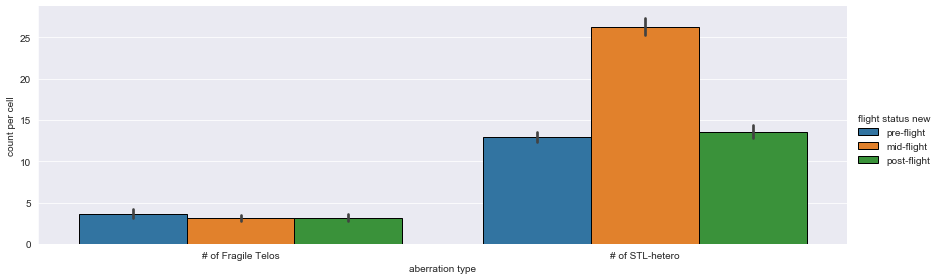

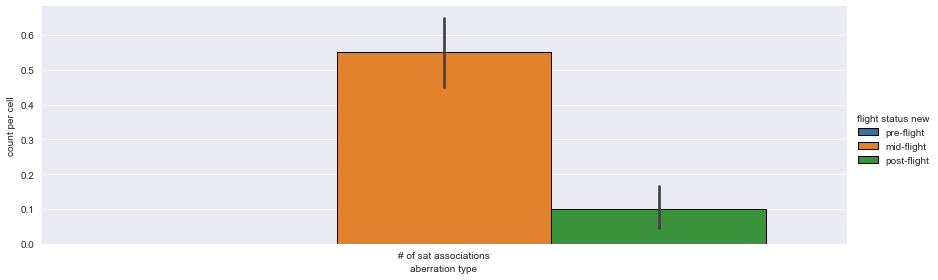

In [15]:
data=mid_combined_melt_all_astro_telo_aberr[melt_all_astro_telo_aberr['aberration type'] != '# of sat associations']
data2=mid_combined_melt_all_astro_telo_aberr[melt_all_astro_telo_aberr['aberration type'] == '# of sat associations']

x='aberration type'
y='count per cell'
hue='flight status new'

ax1= sns.catplot(x=x, y=y, hue=hue, data=data, kind='bar', height=4, aspect=3)

ax2= sns.catplot(x=x, y=y, data=data2, hue=hue, kind='bar', height=4, aspect=3)

Same trends, different perspective w/ mid-flight combined. Heterogenous telomere foci between sister chromatids & satellite associations are elevated mid-flight

## Statistics: telomeric aberrations

In [69]:
cah.scipy_anova_post_hoc_tests(df=mid_combined_melt_all_astro_telo_aberr)         

# of Fragile Telos 0.2669049398450298


# of STL-hetero 1.3327767181546434e-67


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,2.825886e-60,1.947166e-01
mid-flight,2.825886e-60,-1.000000e+00,1.107163e-51
post-flight,1.947166e-01,1.107163e-51,-1.000000e+00




# of sat associations 1.1938851827662757e-16


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,1.005466e-19,2.260462e-03
mid-flight,1.005466e-19,-1.000000e+00,5.607582e-12
post-flight,2.260462e-03,5.607582e-12,-1.000000e+00


In [16]:
cah.scipy_anova_post_hoc_tests(df=mid_combined_melt_all_astro_telo_aberr)         

# of Fragile Telos 0.2669049398450298
# of STL-hetero 1.3327767181546434e-67


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,8.477658e-60,5.841497e-01
mid-flight,8.477658e-60,-1.000000e+00,3.321488e-51
post-flight,5.841497e-01,3.321488e-51,-1.000000e+00




# of sat associations 1.1938851827662757e-16


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,3.016397e-19,6.781387e-03
mid-flight,3.016397e-19,-1.000000e+00,1.682275e-11
post-flight,6.781387e-03,1.682275e-11,-1.000000e+00


# Analyzing chromosome rearrangement data
---

In [3]:
melt_all_astro_chr_aberr = pd.read_csv('../data/compiled and processed data/All_astronauts_chromosome_aberration_data_tidy_data.csv')

# reformatting (float -> int -> str)
melt_all_astro_chr_aberr['astro id'] = melt_all_astro_chr_aberr['astro id'].astype('int')
melt_all_astro_chr_aberr['astro id'] = melt_all_astro_chr_aberr['astro id'].astype('str')

In [4]:
astro_chr_aberr = melt_all_astro_chr_aberr.copy()

astro_chr_aberr['flight status'] = (astro_chr_aberr['flight status'].apply(lambda row: cah.combine_midflight(row)))

def rename_aberr(row):
    if row == 'sister chromatid exchanges':
        return 'classic SCEs'
    elif row == 'total inversions':
        return 'inversions'
    elif row == 'satellite associations':
        return 'sat. associations'
    else:
        return row
    
def rename_flights(row):
    if row == 'pre-flight':
        return 'Pre-Flight'
    elif row == 'mid-flight':
        return 'Mid-Flight'
    elif row == 'post-flight':
        return 'Post-Flight'
    
astro_chr_aberr['aberration type'] = astro_chr_aberr['aberration type'].apply(lambda row: rename_aberr(row))
astro_chr_aberr['flight status'] = astro_chr_aberr['flight status'].apply(lambda row: rename_flights(row))

## Graphing chromosome rearrangements for pre, mid-flight1&2, and post-flight for all astronauts (n=11)

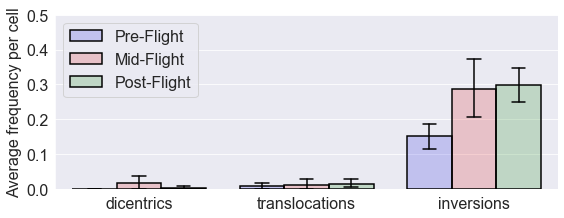

In [16]:
order_cat=['dicentrics', 'translocations', 'inversions',] 
#            'terminal SCEs','classic SCEs', 'subtelo SCEs', 'sat. associations']

plt.figure(figsize=(9, 3.2))
fontsize=16

ax = sns.barplot(x='aberration type', y='count per cell', data=astro_chr_aberr, 
                 order=order_cat, hue='flight status',
                 alpha=None, capsize=0.08, linewidth=1.5, errwidth=1, **{'edgecolor':'black'},
                 ci=95,
                 palette={'Pre-Flight': '#0000FF',
                          'Mid-Flight': '#FF0000',
                          'Post-Flight': '#009900'})    

# alpha setting in sns barplot modifies both bar fill AND edge colors; we want to change just fill
# keep alpha set to None, label bar colors w/ palette
# loop through patches (fill color), grab color ID & reset color w/ alpha at 0.2 
for patch in range(len(ax.patches)):
    color = ax.patches[patch].get_facecolor()
    color = list(color)
    color[3] = 0.2
    color = tuple(color)
    ax.patches[patch].set_facecolor(color)
    
plt.setp(ax.lines, color='black', linewidth=1.5)
plt.xlabel('', fontsize=fontsize)
plt.ylabel('Average frequency per cell', fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylim(0, .5)
plt.legend(fontsize=fontsize)

plt.savefig('../MANUSCRIPT 11 ASTROS/figures/dic trans inv chrr aberr (dGH) 11 astros pre mid post.png', dpi=600)

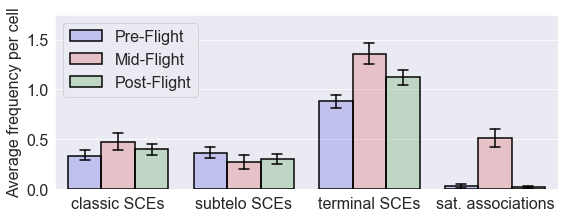

In [15]:
order_cat=['classic SCEs', 'subtelo SCEs', 'terminal SCEs', 'sat. associations']

plt.figure(figsize=(9, 3.2))
fontsize=16

ax = sns.barplot(x='aberration type', y='count per cell', data=astro_chr_aberr, 
                 order=order_cat, hue='flight status',
                 alpha=None, capsize=0.08, linewidth=1.5, errwidth=1, **{'edgecolor':'black'},
                 ci=95,
                 palette={'Pre-Flight': '#0000FF',
                          'Mid-Flight': '#FF0000',
                          'Post-Flight': '#009900'})    

# alpha setting in sns barplot modifies both bar fill AND edge colors; we want to change just fill
# keep alpha set to None, label bar colors w/ palette
# loop through patches (fill color), grab color ID & reset color w/ alpha at 0.2 
for patch in range(len(ax.patches)):
    color = ax.patches[patch].get_facecolor()
    color = list(color)
    color[3] = 0.2
    color = tuple(color)
    ax.patches[patch].set_facecolor(color)
    
plt.setp(ax.lines, color='black', linewidth=1.5)
plt.xlabel('', fontsize=fontsize)
plt.ylabel('Average frequency per cell', fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylim(0, 1.75)
plt.legend(fontsize=fontsize)

plt.savefig('../MANUSCRIPT 11 ASTROS/figures/SCEs chrr aberr (dGH) 11 astros pre mid post.png', dpi=600)

## Statistics: chromosome rearrangements (n=11)

In [37]:
cah.scipy_anova_post_hoc_tests(df=mid_combined_melt_all_astro_chr_aberr, equal_var=True, pool_sd=False)

dicentrics 0.013032431380046457


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000,0.010327,0.315803
mid-flight,0.010327,-1.000000,0.061370
post-flight,0.315803,0.061370,-1.000000




translocations 0.5943683737973546
subtelo SCEs 0.07342033863120888
sister chromatid exchanges 0.022326712604011


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000,0.006151,0.112965
mid-flight,0.006151,-1.000000,0.156364
post-flight,0.112965,0.156364,-1.000000




satellite associations 5.989793836444764e-72


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,1.980937e-40,3.491042e-01
mid-flight,1.980937e-40,-1.000000e+00,3.773372e-43
post-flight,3.491042e-01,3.773372e-43,-1.000000e+00




total inversions 2.1904283223930188e-05


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000,0.000728,0.000005
mid-flight,0.000728,-1.000000,0.815093
post-flight,0.000005,0.815093,-1.000000




terminal SCEs 1.070703299156238e-12


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,5.262530e-14,0.000004
mid-flight,5.262530e-14,-1.000000e+00,0.000663
post-flight,4.417562e-06,6.634653e-04,-1.000000


In [23]:
cah.scipy_anova_post_hoc_tests(df=mid_combined_melt_all_astro_chr_aberr, equal_var=True, pool_sd=False)

dicentrics 0.013032431380046457


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000,0.030982,0.94741
mid-flight,0.030982,-1.000000,0.18411
post-flight,0.947410,0.184110,-1.00000




translocations 0.5943683737973546
subtelo SCEs 0.07342033863120888
sister chromatid exchanges 0.022326712604011


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000,0.018453,0.338895
mid-flight,0.018453,-1.000000,0.469092
post-flight,0.338895,0.469092,-1.000000




satellite associations 5.989793836444764e-72


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,5.942811e-40,1.000000e+00
mid-flight,5.942811e-40,-1.000000e+00,1.132012e-42
post-flight,1.000000e+00,1.132012e-42,-1.000000e+00




total inversions 2.1904283223930188e-05


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000,0.002185,0.000014
mid-flight,0.002185,-1.000000,1.000000
post-flight,0.000014,1.000000,-1.000000




terminal SCEs 1.070703299156238e-12


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,1.578759e-13,0.000013
mid-flight,1.578759e-13,-1.000000e+00,0.001990
post-flight,1.325269e-05,1.990396e-03,-1.000000


Same results, different perspective. Let's remove the mid-flight data real quick and 
then look at just our 3 unrelated astronauts w/ inflight data

In [24]:
mid_flight_removed = mid_combined_melt_all_astro_chr_aberr[mid_combined_melt_all_astro_chr_aberr['flight status new'] != 'mid-flight']

Text(0.5, 1.0, 'chr aberr by subtelo dgh: 11 astros, pre-, post-')

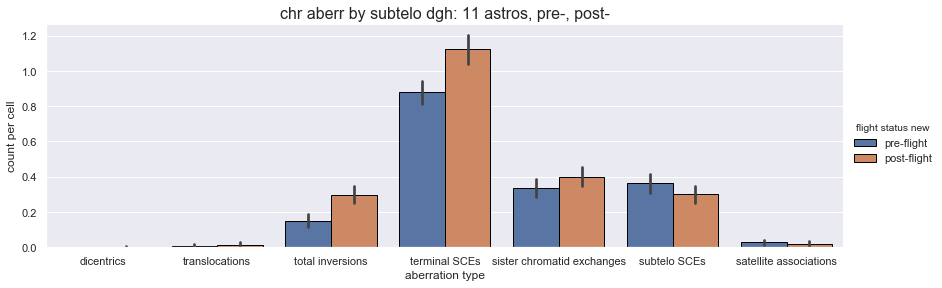

In [26]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status new', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=mid_flight_removed)

plt.title('chr aberr by subtelo dgh: 11 astros, pre-, post-', fontsize=16)

## Graphing chromosome rearrangements for pre, mid-flight1&2, and post-flight for all astronauts (n=3)

In [25]:
mid_combined = mid_combined_melt_all_astro_chr_aberr
mid_flight_only_astros = mid_combined[mid_combined['astro id'].isin(['2171', '1536', '5163'])]
list(mid_flight_only_astros['astro id'].unique())

['2171', '5163', '1536']

Text(0.5, 1.0, 'chr aberr by subtelo dgh: 3 astros, pre-, mid1&2-, post-')

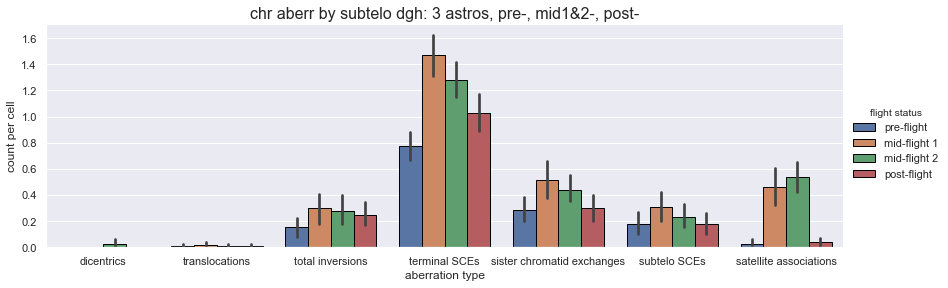

In [85]:
order_cat=['dicentrics', 'translocations', 'total inversions', 'terminal SCEs',
           'sister chromatid exchanges', 'subtelo SCEs', 'satellite associations']

ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=mid_flight_only_astros)

plt.title('chr aberr by subtelo dgh: 3 astros, pre-, mid1&2-, post-', fontsize=16)

Text(0.5, 1.0, 'chr aberr by subtelo dgh: 3 astros, pre-, mid-, post-')

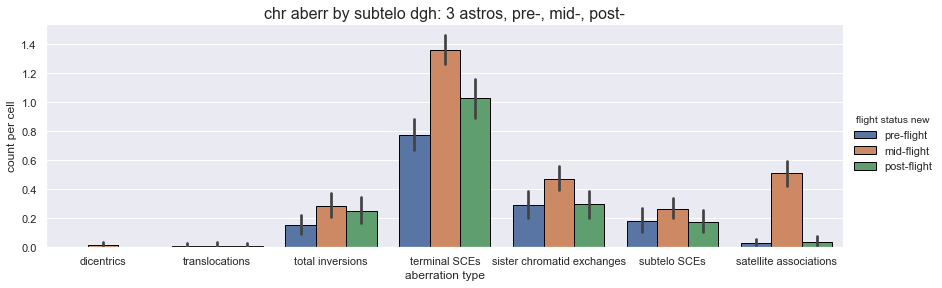

In [29]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status new', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=mid_flight_only_astros)

plt.title('chr aberr by subtelo dgh: 3 astros, pre-, mid-, post-', fontsize=16)

In [30]:
grouped_mid_flight_only_astros = mid_flight_only_astros.groupby(['astro id', 'flight status', 'flight status new', 'aberration type']).agg('mean').reset_index()

In [87]:
# mid_flight_only_astros

## Statistics: chromosome rearrangements (n=3)

In [28]:
cah.scipy_anova_post_hoc_tests(df=mid_flight_only_astros)

dicentrics 0.1680346092990635


translocations 0.9856282137883281


subtelo SCEs 0.1589789180031884


sister chromatid exchanges 0.005121046330124425


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000,0.005266,0.908321
mid-flight,0.005266,-1.000000,0.008434
post-flight,0.908321,0.008434,-1.000000




satellite associations 9.398729515217063e-23


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,2.177563e-19,6.760813e-01
mid-flight,2.177563e-19,-1.000000e+00,2.350928e-18
post-flight,6.760813e-01,2.350928e-18,-1.000000e+00




total inversions 0.08006602120484704


terminal SCEs 3.9203790142420205e-11


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,8.923163e-13,0.006061
mid-flight,8.923163e-13,-1.000000e+00,0.000266
post-flight,6.060696e-03,2.655030e-04,-1.000000


In [26]:
cah.scipy_anova_post_hoc_tests(df=mid_flight_only_astros)

dicentrics 0.1680346092990635
translocations 0.9856282137883281
subtelo SCEs 0.1589789180031884
sister chromatid exchanges 0.005121046330124425


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000,0.015797,1.000000
mid-flight,0.015797,-1.000000,0.025303
post-flight,1.000000,0.025303,-1.000000




satellite associations 9.398729515217063e-23


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,6.532688e-19,1.000000e+00
mid-flight,6.532688e-19,-1.000000e+00,7.052785e-18
post-flight,1.000000e+00,7.052785e-18,-1.000000e+00




total inversions 0.08006602120484704
terminal SCEs 3.9203790142420205e-11


,pre-flight,mid-flight,post-flight
pre-flight,-1.000000e+00,2.676949e-12,0.018182
mid-flight,2.676949e-12,-1.000000e+00,0.000797
post-flight,1.818209e-02,7.965091e-04,-1.000000


In [28]:
df = mid_flight_only_astros

display(sp.posthoc_ttest(df[df['aberration type'] == 'total inversions'], val_col='count per cell', 
                                     group_col='flight status new', equal_var=False))

,pre-flight,mid-flight,post-flight
pre-flight,-1.000000,0.017269,0.091743
mid-flight,0.017269,-1.000000,0.548192
post-flight,0.091743,0.548192,-1.000000
